# Intro to ANNs

Artificial Neural Networks has been around for a while with varying interest. NNs regularly outperform other ML techniques on very large and complex problems. Experts expect NNs to stay popular this time due to the vast amount of available data and compute power. Although this all sounds good, lack of explainability (black box model) could become more of an issue with AI ethics.

## 1. Perceptron

Invented in 1957, the Perceptron is one of the simplest ANN architecture. It consists of just one **threshold logic unit (TLU)**, which computes the weighted sum of the inputs and applies a step function (as activation function) to that sum to generate outputs. 

Thus, the Perceptron with a single TLU can be used for simple linear binary classification similar to Logistic Regression. Once the weighted sum exceeds the threshold, the instance is considered to be positive, else negative. Extending the Perceptron with multiple TLUs allows for multiclass predictions.

A big downside of Perceptrons is that they are incapable of learning complex patterns since the decision boundary is linear (same as in Logistic Regression). A more complex ANN is necesseray for linearily non-separable datasets. Furthermore, compared to Logistic regression the Perceptron does not output class probabiity but class belonging based on a hard threshold, which is why Logistic Regression should be preferred.

**Let's apply the Perceptron with a single TLU to the iris dataset**

In [2]:
# load data
from sklearn import datasets
import numpy as np
from sklearn.linear_model import Perceptron

iris = datasets.load_iris()

X = iris["data"][:,2:3] # Petal length and width
y = (iris["target"]==0) # Setosa?
y = y.astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 2. Multilayer Perceptron (MLP)
A single TLU Perceptron is very limited. Some if its limitations can be eliminated by stacking multiple Perceptrons together as multiple layers, resulting in a network architecture called **Multilayer Perceptron (MLP)**.

An MLP is composed of one input layer followed by multiple layers of TLUs (hidden layers) and a final layer of TLUs (output layer). Every layer except the output layer has a bias unit. Each layer is fully connected. 

One key difference is that instead of a step function, MLPs use a **sigmoid function** as activation function. Otherwise, the flat surface of a stepfunction would make it impossible to calculate gradients, and the Gradient Descent algorithm for optimization would not worked (other functions would work too, like ReLu).

In [4]:
# Perceptron (single TLU)
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

perceptron = Perceptron(random_state=1, max_iter=300).fit(X_train, y_train)

print("actual classes: " + str(y_test))
print("predicted classes: " + str(perceptron.predict(X_test)))
print("accuracy score: " + str(perceptron.score(X_test, y_test)))

actual classes: [1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1]
predicted classes: [1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1]
accuracy score: 0.92


In [5]:
# Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

mlp_clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

print("actual classes: " + str(y_test))
print("predicted classes: " + str(mlp_clf.predict(X_test)))
#print(mlp_clf.predict_proba(X_test).ravel())
print("accuracy score: " + str(mlp_clf.score(X_test, y_test)))
print("number of layers: " + str(mlp_clf.n_layers_))

actual classes: [1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1]
predicted classes: [1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1]
accuracy score: 0.88
number of layers: 3


The **Backpropagation** algorithm is essentially calculating gradient descent forward and backwards, thus finding the network error with regard to every single model parameter. Knowing the error per parameter setting let's us tweak the weights in order to reduce the error. This is repeated until the network converges to a solution.

Note: Automatically computing gradients is called **automatic differentiation (autodiff)**. Backpropagation is a type of autodiff, called reverse-mode autodiff.

### Learning process:

- We start with random weights (initialization).

- Using mini-batches, the algorithm goes through the full training set multiple times. Each passthrough is called an **epoch**. 

- The result of one layer becomes the input of the next layer until we reach the final layer (forward pass). 

- Then the output is compared to the desired output and a measure of error is returned. 

- Next, it calculates how much each output connection contributed to the error, and how much of the error came from the connections in the layer before, and so on (reverse pass). 

- Finally, Gradient Descent is performed to tweak all the connction weights in the network using the error gradients just computed.

- All this together is called Backpropagation.

## 2.1 MLP for Regression

To predict a single value like housing prices, we need one output layer (one output layer per output dimension). We won't need an activation function before the output layer if we don't want to limit the value range. In case we want to make sure the output is only positive, we can use the ReLu function. Sigmoid function and scaling should be used when the value should be bound to a certain range. MSE or MAE are standard loss functions for MLP regressions.


## 2.2 MLP for Classification

A binary classification problem can be solved with a single output neuron and a sigmoid activation function. The resulting number corresponds to the estimated probabibility of belonging to the positive class. In multiclass problems we need one output neuron per class and use softmax as activation function. A standard loss function is the cross-entropy loss (or log loss).

# 3. Keras & Tensorflow Examples

## 3.1 Multiclass Classification

We are faced with a multiclass classification problem where we have a couple thousand images of fashion items and want to predict the item class for unseen new product images (fashion MNIST).

In [6]:
import tensorflow as tf
from tensorflow import keras

# fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
class_names = ["T-Shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
              "Sneaker", "Bag", "Ankle boot"]

In [8]:
# create validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale input features (pixel intensity) to a 0-1 range
X_train, X_valid = X_train/255.0, X_valid/255.0

The first model is a simple Sequential model, a stack of layers that are sequentially connected. The first layer is used for preprocessing and converts the input image into a 1D array, similar to X.reshape(-1, 28 times 28). The second layer is a Dense layer of 300 neurons that are fully connected to the next layer, together with a ReLu activation function. The next layer is similar but with 100 neurons. The final output layer has 10 neurons for the ten fashion item classes and uses a softmax function as activation function, since the classes are mutually exclusive.

In [9]:
# Model definition
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
# Alternative notation
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
# print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


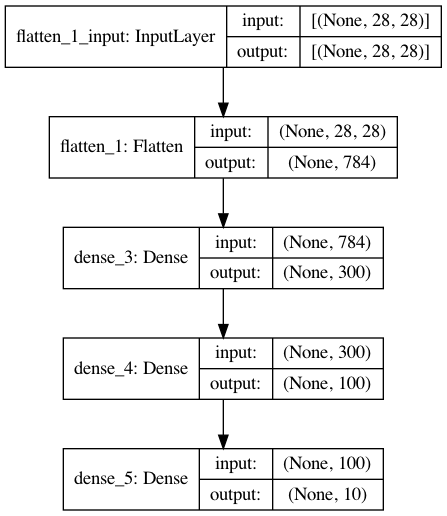

In [12]:
# plot model
keras.utils.plot_model(model, show_shapes=True)

Next, we specify the loss function and optimizer. Regarding the **loss function**: Since we predict the class, we are dealing with sparse labels (only one of the ten can have values). If we would predict class probability, we would use loss="categorical_crossentropy" and in a binary problem with sigmoid instead of a softmax activation function in the final layer, we would use loss="binary_crossentropy". We use Stochastic Gradient Descent as the **optimizer** to enable backpropagation as descibed above. We use accuracy as the **evaluation metric** during training and and validation.

In [14]:
# specify loss function and optimizer
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [15]:
# fit the model
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0184 - accuracy: 0.6834 - val_loss: 0.5062 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5014 - accuracy: 0.8272 - val_loss: 0.4538 - val_accuracy: 0.8446
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4531 - accuracy: 0.8413 - val_loss: 0.4527 - val_accuracy: 0.8354
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4163 - accuracy: 0.8537 - val_loss: 0.4055 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3934 - accuracy: 0.8630 - val_loss: 0.3756 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3843 - accuracy: 0.8659 - val_loss: 0.3899 - val_accuracy: 0.8620
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3726 - accuracy: 0.8686 - val_loss: 0.3689 - val_accuracy:

(0.0, 1.0)

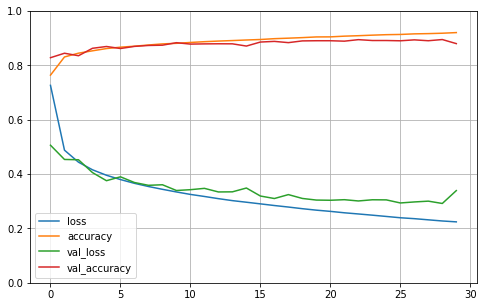

In [17]:
# plot learning curves
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 937us/step - loss: 84.5864 - accuracy: 0.8298


[84.58635711669922, 0.829800009727478]

In [23]:
# use model to make predictions
y_proba = model.predict(X_test[:3])
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 3.2 Regression
We will try to predict housing prices on a simplified California housing dataset that only contains numerical features and no missing values.
The model almost looks exactly like in the classification problem with the difference of only one output neuron and no activation function. To avoid overfitting the noisy data we use only one hidden layer.

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [34]:
# model definition
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

# training
history = model.fit(X_train, y_train, epochs=50,
                   validation_data=(X_valid, y_valid))

Epoch 1/50
363/363 [==============================] - 0s 811us/step - loss: 1.2145 - val_loss: 7.6042
Epoch 2/50
363/363 [==============================] - 0s 592us/step - loss: 0.4896 - val_loss: 9.9790
Epoch 3/50
363/363 [==============================] - 0s 594us/step - loss: 0.4488 - val_loss: 1.7912
Epoch 4/50
363/363 [==============================] - 0s 600us/step - loss: 0.4195 - val_loss: 0.4037
Epoch 5/50
363/363 [==============================] - 0s 599us/step - loss: 0.3938 - val_loss: 0.3897
Epoch 6/50
363/363 [==============================] - 0s 602us/step - loss: 0.4013 - val_loss: 0.3890
Epoch 7/50
363/363 [==============================] - 0s 596us/step - loss: 0.3989 - val_loss: 0.3877
Epoch 8/50
363/363 [==============================] - 0s 603us/step - loss: 0.3762 - val_loss: 0.4164
Epoch 9/50
363/363 [==============================] - 0s 600us/step - loss: 0.3800 - val_loss: 0.3654
Epoch 10/50
363/363 [==============================] - 0s 596us/step - loss: 0.367

(0.0, 1.0)

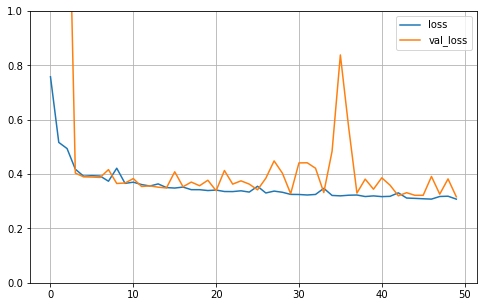

In [35]:
# plot learning curves
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [36]:
# evaluation
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 533us/step - loss: 0.2895
